In [59]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

all_strings = ["05zT","05zT_working_old","05zT_3bins","05zT_2bins"," ","1zT","15zT","2zT"," ","pT_Rebin_3","pT_Rebin_5"," ","zT_Rebin_5","zT_Rebin_6","zT_Rebin_8","zT_Rebin_9"]

def f(x):
    return x

In [60]:
description_string = interact(f, x=all_strings);

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUneCcsIG9wdGlvbnM9KCcwNXpUJywgJzA1elRfd29ya2luZ19vbGQnLCAnMDV6VF8zYmlucycsICcwNXpUXzJiaW7igKY=


In [29]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

purities:
[ 0.2080955   0.33947809  0.48394409  0.509     ]
[ 0.03765166  0.04768804  0.04896864  0.048     ]
['../InputData/05zT/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/05zT/pPb_SE_L0_Correlation_GMB_Ratio.root']


In [30]:
Corrs = ROOT_to_nparray()
print(purity)

[ 0.2080955   0.33947809  0.48394409  0.509     ]


In [31]:
Show_Plots = False
if (Ped_Sub_First):
    if (Show_Plots):
        Plot_UB()
        Plot_Sub_UB_Overlay(Corrs)
    Correlated_Subtraction(Corrs)
    
else:
    Correlated_Subtraction(Corrs)
    if (Show_Plots):
        Plot_UB_Subtraction(Corrs)
    Ped_Sub_After_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

In [32]:
#Plot_pp_pPb_Cs(Corrs)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [33]:
Frags = Get_Fragmentation(Corrs)

## p-Pb / pp

In [34]:
reload(functions_fragmentation)
from functions_fragmentation import *
print(Frags["pp_FF"][2])

[ 10.90871156   4.16389709   2.72244827   0.63037188   0.22671996
   0.06758462   0.0123051 ]


**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [35]:
Combined_Frags = Average_FF(Frags)

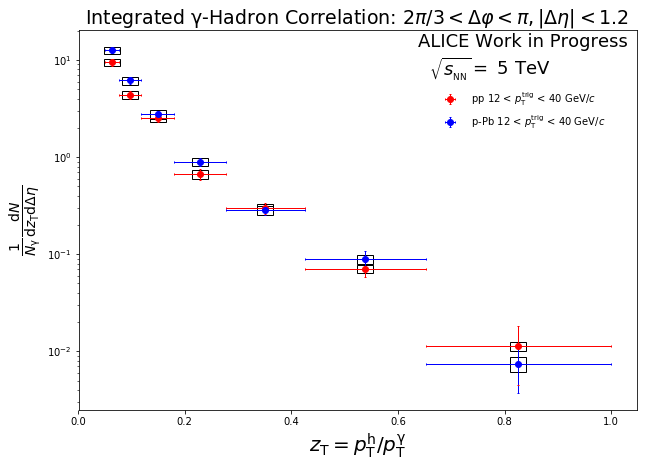

                    pp Central Values:
[ 9.48913607  4.3936676   2.53287517  0.66593616  0.30061156  0.07046112
  0.01127915]

                    pp Stat. Uncertainty:
[ 0.7809086   0.4343031   0.22467884  0.08798533  0.0394265   0.01245547
  0.0068107 ]

                    p-Pb Central Values:
[  1.25604256e+01   6.16695034e+00   2.77538071e+00   8.99028267e-01
   2.85473464e-01   8.89610049e-02   7.43618251e-03]

                    p-Pb Stat. Uncertainty:
[ 0.86267738  0.46580782  0.22791079  0.08586949  0.03014323  0.01896463
  0.00369174]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 8\%-60\% & 7\%-50\% \\
\hline
Purity & 6\%-9\% & 7\%-16\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [36]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [10]:
reload(functions_fragmentation)
from functions_fragmentation import *

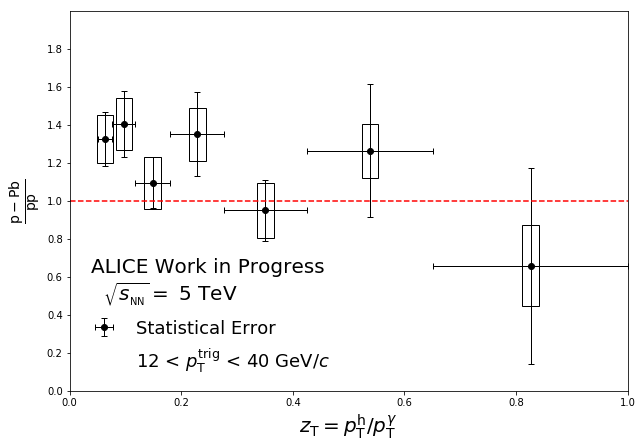

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]

                Ratio Uncertainty from Purity:
[ 0.08601703  0.09570078  0.11193802  0.1022493   0.12898119  0.1082874
  0.20932792]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.09359716  0.09924948  0.07748074  0.09546095  0.06714985  0.08927608
  0.04661855]

                Full Systematic Uncertainty:
[ 0.12711947  0.13787349  0.13613738  0.13988464  0.14541406  0.14034379
  0.21445622]

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      3.85042
NDf                       =            5
p0                        =      1.34564   +/-   0.112351    
p1                        =    -0.786761   +/-   0

In [11]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

/global/common/cori/software/python/2.7-anaconda-5.2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


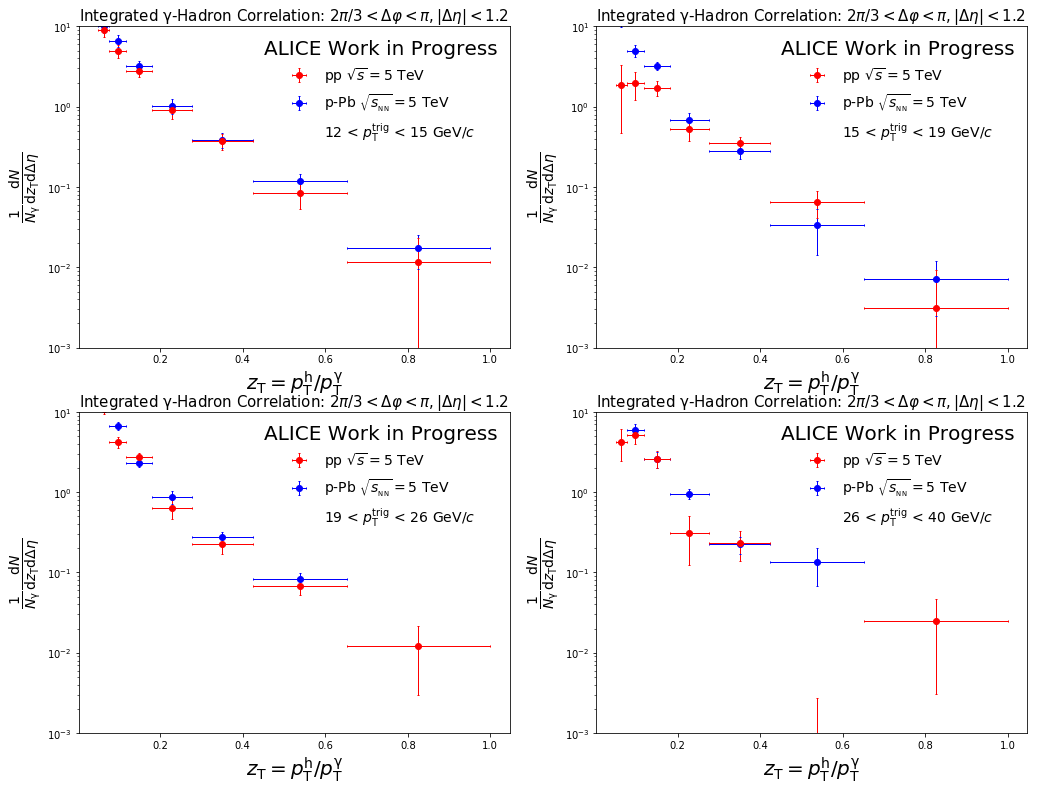

In [12]:
Plot_FF(Frags)

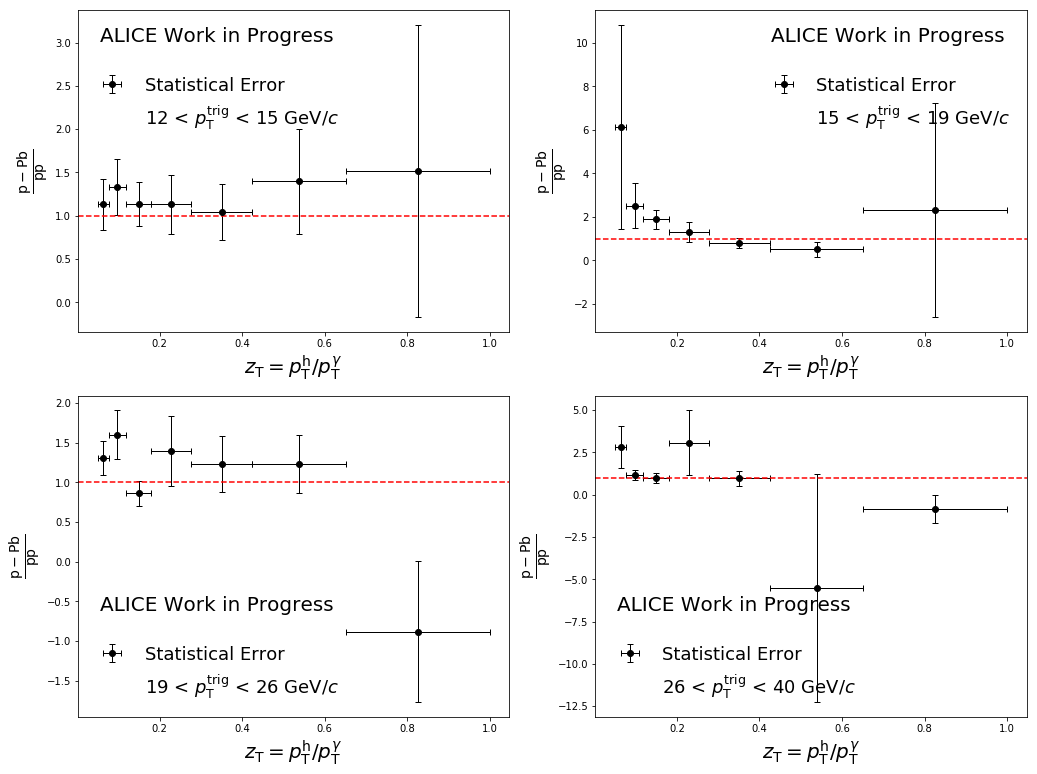

In [13]:
FF_Ratio(Frags)

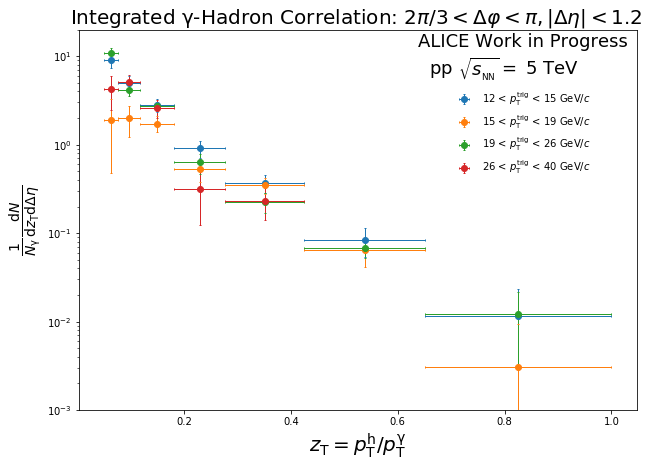

                             PROTON-PROTON:
Central Values
[[  9.00084080e+00   5.00540194e+00   2.81461299e+00   9.07641615e-01
    3.72926088e-01   8.41519652e-02   1.15662682e-02]
 [  1.88010833e+00   1.98590564e+00   1.73148991e+00   5.29004472e-01
    3.48745915e-01   6.49391442e-02   3.09806338e-03]
 [  1.09087116e+01   4.16389709e+00   2.72244827e+00   6.30371878e-01
    2.26719955e-01   6.75846212e-02   1.23050966e-02]
 [  4.25722684e+00   5.08946693e+00   2.60404605e+00   3.12260391e-01
    2.33345980e-01  -2.40831815e-02   2.48911060e-02]]
Statistical Errors (Relative)
[[ 0.18184871  0.18259902  0.15870045  0.21715755  0.23256552  0.36680446
   1.01465905]
 [ 0.74823685  0.38082176  0.20566847  0.29184799  0.21451515  0.36413242
   2.01766161]
 [ 0.12661034  0.15832329  0.12333294  0.25556169  0.2459495   0.23455813
   0.76100931]
 [ 0.41962896  0.21307367  0.23314963  0.60104737  0.39841246 -1.11337607
   0.87805738]]
Relative Uncertainty from Purity
[[  1.91860549e+00   1.0

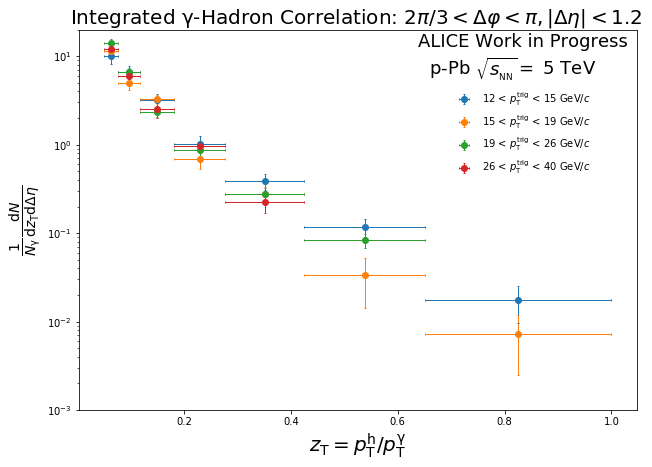

                              PROTON-LEAD:
Central Values
[[  1.01644751e+01   6.64820113e+00   3.19653352e+00   1.02714129e+00
    3.87061773e-01   1.17565595e-01   1.75313677e-02]
 [  1.15366091e+01   5.00392260e+00   3.25692861e+00   6.89027164e-01
    2.77652740e-01   3.34414962e-02   7.19613103e-03]
 [  1.42579359e+01   6.65352137e+00   2.34079127e+00   8.77996605e-01
    2.78688362e-01   8.28824076e-02  -1.08336359e-02]
 [  1.19266379e+01   5.95350167e+00   2.55437863e+00   9.59530836e-01
    2.23669165e-01   1.33277885e-01  -2.12567241e-02]]
Statistical Errors (Relative)
[[ 0.18959884  0.16192439  0.1591135   0.20692518  0.20772041  0.23597794
   0.45641178]
 [ 0.14948957  0.17282412  0.11904903  0.22263899  0.20426653  0.57196376
   0.6577689 ]
 [ 0.10253129  0.10861847  0.12949677  0.1898486   0.1548431   0.18419723
  -0.67165089]
 [ 0.14719775  0.17150886  0.2249538   0.15276328  0.24466755  0.4969037
  -0.41730799]]
Relative Uncertainty from Purity
[[  2.16664400e+00   1.417

In [14]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

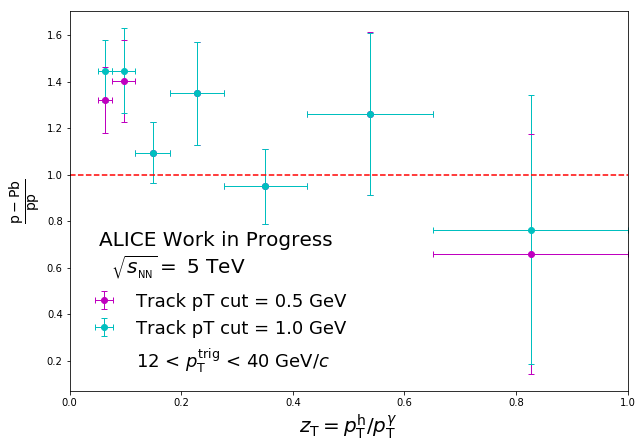

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]


In [15]:
Ratio_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_1zT.npy")
Ratio_Errors_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_1zT.npy")
Ratio_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_05zT.npy")
Ratio_Errors_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_05zT.npy")

Compare_pp_pPB_Avg_Ratio(Ratio_05zt,Ratio_Errors_05zt,"Track pT cut = 0.5 GeV",Ratio_1zt,Ratio_Errors_1zt,"Track pT cut = 1.0 GeV")

In [16]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

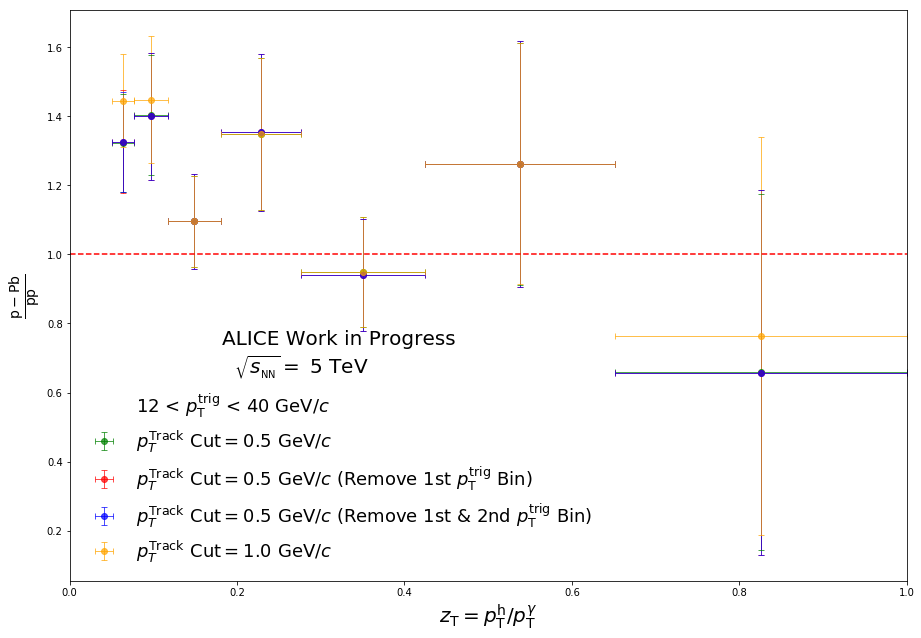

                Central Values:
[ 1.4457051   1.4481745   1.09574319  1.3500227   0.94988511  1.26222862
  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      6.55659
NDf                       =            6
p0                        =      1.18867   +/-   0.0714348   

****************************************
Minimizer is Linear
Chi2                      =      6.59049
NDf                       =            6
p0                        =      1.19041   +/-   0.070857    

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   


In [17]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

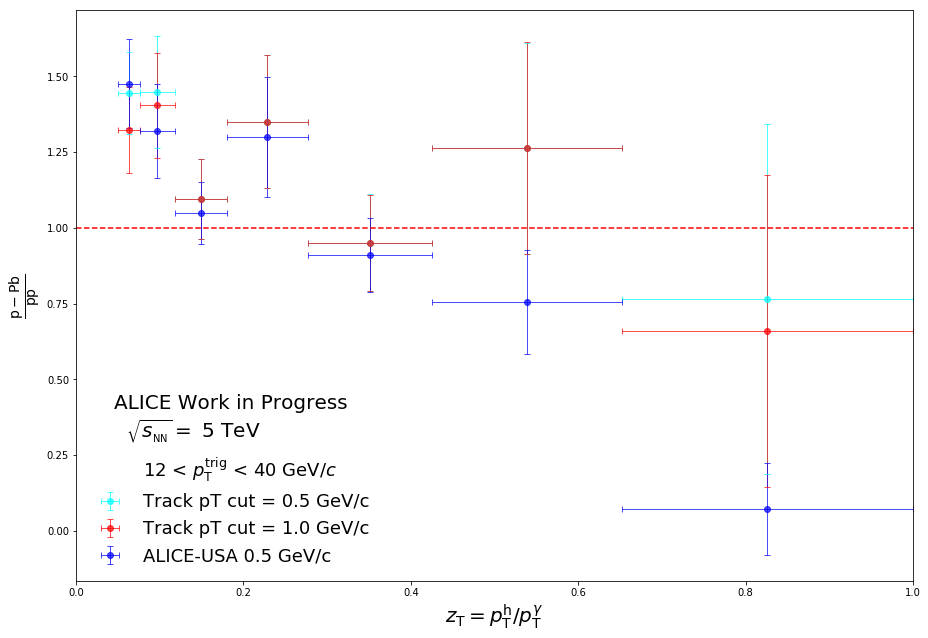

                Central Values:
[ 1.47546927  1.31963154  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      57.1819
NDf                       =            6
p0                        =     0.979532   +/-   0.053191    


In [18]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

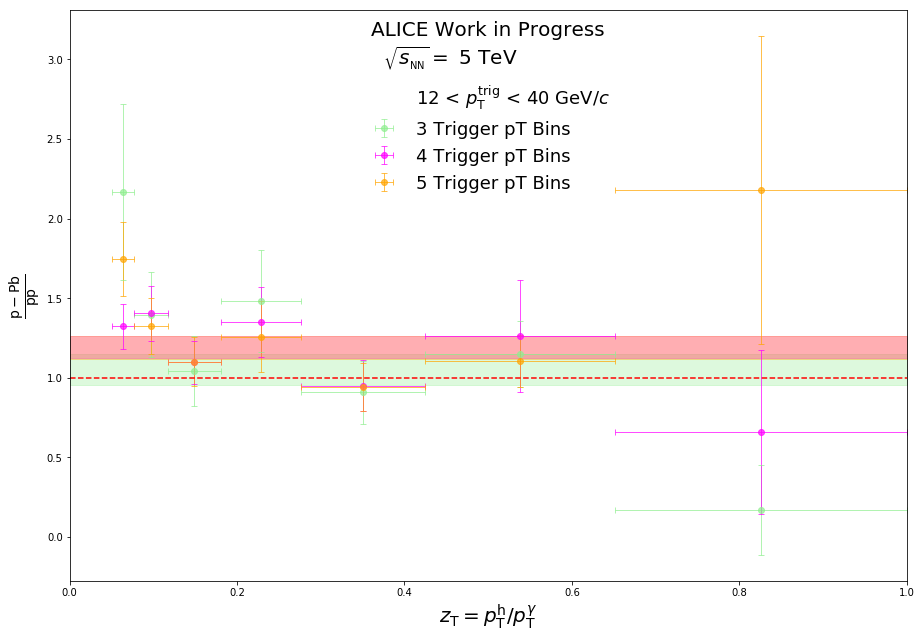

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.10477787
  2.1777261 ]

****************************************
Minimizer is Linear
Chi2                      =      17.9885
NDf                       =            6
p0                        =      1.05202   +/-   0.0958624   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      10.8027
NDf                       =            6
p0                        =      1.18779   +/-   0.0715211   


In [19]:
strings = ["pT_Rebin_3","05zT","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [20]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


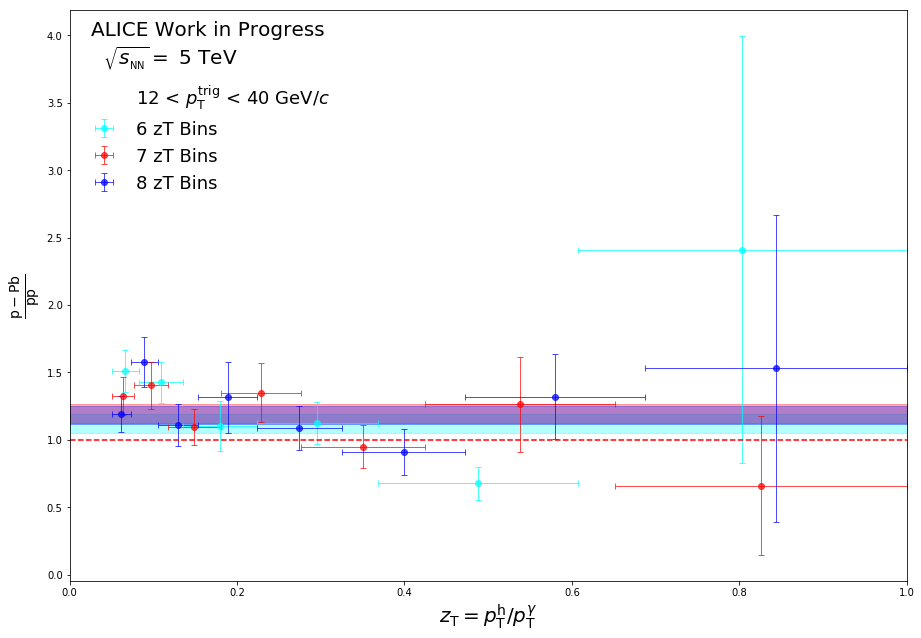

                Central Values:
[ 1.19281029  1.57617169  1.1100219   1.31426036  1.08778698  0.90913137
  1.31994451  1.53097558]

****************************************
Minimizer is Linear
Chi2                      =      23.6267
NDf                       =            5
p0                        =      1.12038   +/-   0.0677459   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      8.12662
NDf                       =            7
p0                        =      1.18291   +/-   0.0673123   


In [21]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins"]
colors = ["cyan","red","blue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)